<a href="https://colab.research.google.com/github/hrbae/LG_AI_training/blob/main/M1_Proces_Innovationby_ML/Practice_1_1_Process_mining_with_Python(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Process mining with Python


##1. Process mining Overview

*  정보시스템에 기록되어있는 이벤트 로그 데이터에서 지식을 추출함으로써 사람들이 머리 속에서 추정하고 잇는 프로세스가 아닌 실제 업무 프로세스를 도출하고, 모니터링하며, 개선하는 방법론
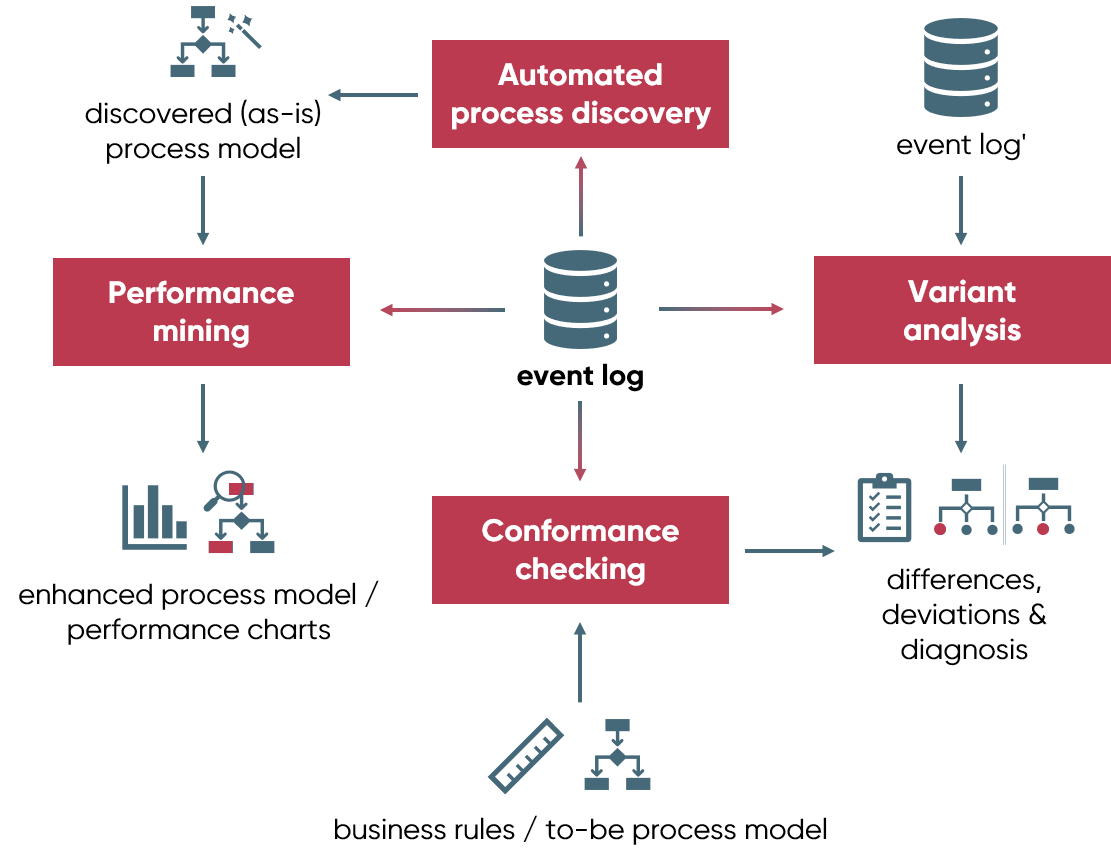












##2.Process Mining Tool



1. Disco (https://fluxicon.com/disco/)
- 네덜란드 'Fluxicon'이라는 업체가 만든 프로세스 마이닝 솔루션
- 전세계에서 가장 많이 사용되는 프로세스 마이닝 솔루션 중 하나
- 장점: 사용이 가장 쉽고, 편하다. 코딩을 직접하지 않고 버튼으로 기본적인 분석이 가능하다. 간편한 UI를 제공한다.
- 단점: 단순한 Process model을 발견할 수 잇지만, 정밀한 분석 작업을 진행하는 게 쉽지 않고, 세부적인 파라미터 및 값 설정이 제한된다.
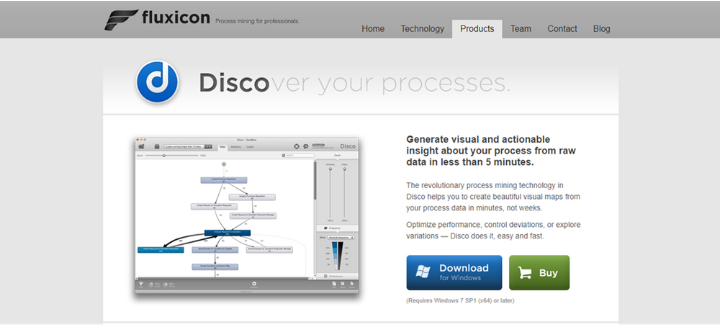


2. pm4py (https://pm4py.fit.fraunhofer.de/)


*   독일 'Fraunhofer FIT'에서 개발하였으며, 지속적으로 업데이트를 제공해주는 프로세스 마이닝 솔루션
*   Python으로 개발되어 있으며, 자유롭게 설치하여 사용가능
*   장점: Python 사용자들이 사용이 편하고 다른 프레임워크들과 협업이 쉽다.
*   단점: 시각화의 확장성이 부족하고, 데이터의 용량이 커질수록 분석시간이 비약적으로 증가한다.






3. ProM (https://promtools.org/)
*   독일 아헨공대 Aalst교수 연구팀이 만든 프로세스 마이닝 소프트웨어
*   Java로 개발되어있으며, 새로운 기능이 Plug-in 형태로 개발되어 추가되고 있음
*   장점: 특별한 목적을 가진 분석(ad-hoc)에 특화된 프로그램이며 거의 모든 현존 프로세스 마이닝 관련 패키지(plug-in)을 지원한다. 프로그램이 도메인이나 조직의 특성에 맞게 커스터마이징 가능하다.
*   단점: ProM 은 높은 프로세스 마이닝 지식을 요구한다. Discover Concurrency의 불가능함과 한정된 적합도 검사 방법을 가지고 있다. ProM은 정확하게 일치하는 모델이나 적합도 검사보다는 Performance Analysis에 더욱 초점을 둔다.

In [1]:
# pm4py 설치
!pip install pm4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=20d46bd95212ef13914e2212a1d27c45da614b0fd2f23024d82ec8cea1db7b52
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree


In [2]:
# 필요 라이브러리 호출
import pm4py
import pandas as pd

In [3]:
#Colab drive 모듈 이용하여 연동
from google.colab import drive
drive.mount('/content/gdriv')

Mounted at /content/gdriv


#데이터 설명
*   출처: BPI Challenge 2016 (https://data.4tu.nl/collections/ea85f19e-26a9-497a-9ac8-06afb069d6a7)
*   네덜란드에서 고용 보험관련하여 웹사이트에서 기록된 로그인 가능한 회원들의 "사이트 내 이동 경로", "컴플레인 사항"에 관한 이벤트 로그

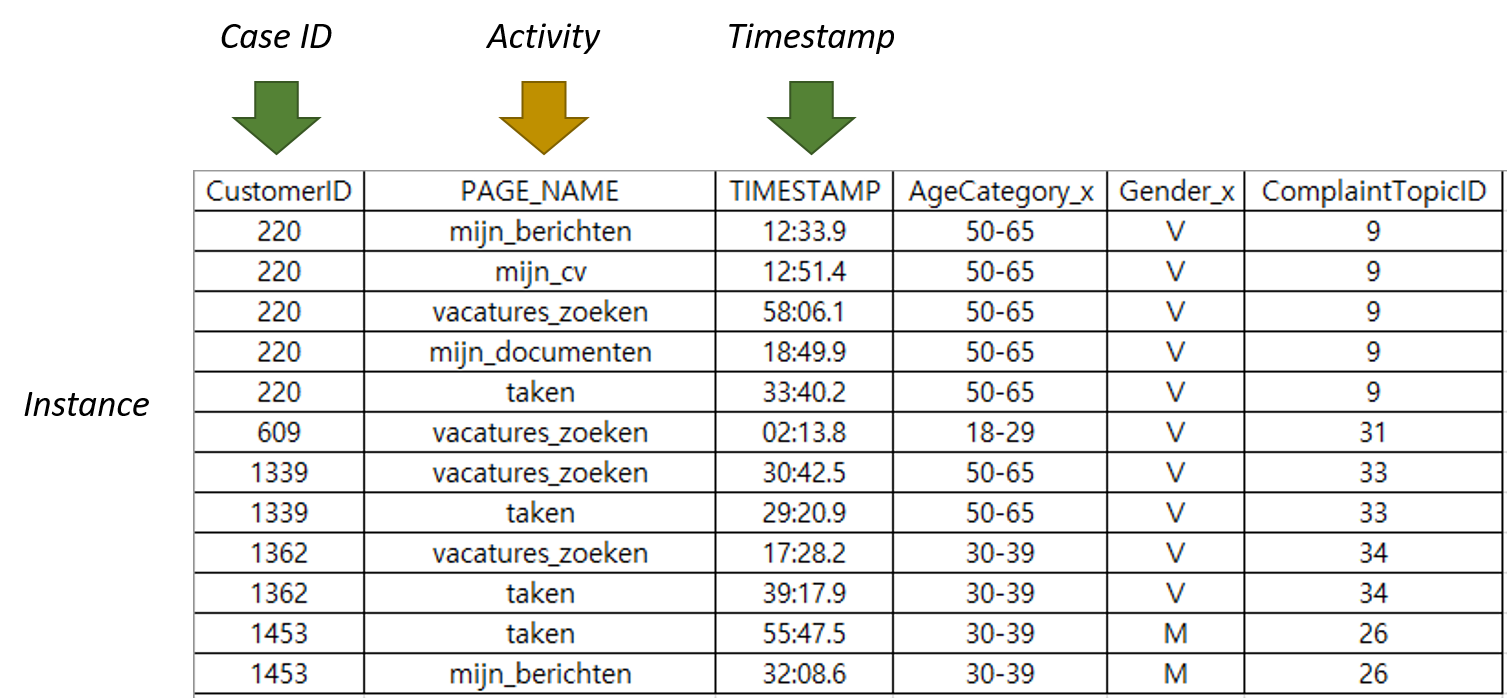


In [4]:
# 실습용 데이터 호출
init_log = pd.read_csv('https://raw.githubusercontent.com/hrbae/LG_AI_training/main/M1_Proces_Innovationby_ML/eventlog%20(2).csv')
init_log

CustomerID           PAGE_NAME                TIMESTAMP AgeCategory_x  \
0         2025826              50plus  2015-10-05 10:12:56.880         50-65   
1         1503890        aanvragen-tw  2015-09-01 19:35:06.707         50-65   
2         2063574              50plus  2015-11-06 10:47:42.137         40-49   
3         2185161  bijstandsuitkering  2016-01-11 18:44:07.877         18-29   
4         2074173           frankrijk  2015-11-09 22:43:19.973         50-65   
...           ...                 ...                      ...           ...   
55213     2196444               taken  2016-01-21 19:45:08.400         50-65   
55214     2043571                 wdo  2015-07-28 11:45:54.743         40-49   
55215      990071                 wdo  2016-01-20 12:05:50.680         30-39   
55216     2074505                 wdo  2015-09-04 11:42:24.867         18-29   
55217     2101966                 wdo  2015-11-25 14:28:52.127         50-65   

      Gender_x  ComplaintTopicID  
0            M              59.0  
1            V              20.0  
2            M              33.0  
3            V              32.0  
4            V              19.0  
...        ...               ...  
55213        M              31.0  
55214        M              26.0  
55215        V              29.0  
55216        V              26.0  
55217        M               9.0  

[55218 rows x 6 columns]

In [5]:
init_log.dtypes

CustomerID            int64
PAGE_NAME            object
TIMESTAMP            object
AgeCategory_x        object
Gender_x             object
ComplaintTopicID    float64
dtype: object


*   CustomerID와 TIMESTAMP의 datatype을 변경
---
*   CustomerID: int64 -> object
*   TIMESTAMP: object -> datetime64


In [6]:
init_log['CustomerID']=init_log['CustomerID'].astype(str)

init_log.dtypes

CustomerID           object
PAGE_NAME            object
TIMESTAMP            object
AgeCategory_x        object
Gender_x             object
ComplaintTopicID    float64
dtype: object

> 실습 1> TIMESTAMP DATETIME형식으로 변환

In [8]:
init_log['TIMESTAMP'] = pd.to_datetime(init_log['TIMESTAMP'])
init_log.dtypes

CustomerID                  object
PAGE_NAME                   object
TIMESTAMP           datetime64[ns]
AgeCategory_x               object
Gender_x                    object
ComplaintTopicID           float64
dtype: object

#데이터 필터링



In [13]:
#Activity 목록 도출
from pm4py.algo.filtering.pandas.attributes import attributes_filter
activities=attributes_filter.get_attribute_values(init_log, attribute_key='PAGE_NAME')
print(activities)

{'taken': 11114, 'vacatures_zoeken': 10246, 'mijn_werkmap': 6643, 'mijn_berichten': 4926, 'wdo': 4114, 'mijn_cv': 3724, 'mijn_sollicitaties': 3151, 'mijn_online_trainingen': 2171, 'foutopgetreden.html': 1435, 'home': 1286, 'timeout.htm': 1054, 'mijn_bewijs_van_inschrijving': 872, 'wijziging_doorgeven': 842, 'mijn_documenten': 798, 'Portal (ignore_request_page)': 685, 'sollicitatie-wijziging': 542, 'mijn_tips': 355, 'mijn_rechten_en_plichten': 222, 'inschrijven': 161, 'mijn_agenda': 155, 'mijn_netwerk': 114, 'wdo211832': 101, 'werk-zoeken': 81, 'handleiding': 79, 'evenement': 66, 'PORTAL.wwsec_app_priv.logout': 60, 'onderhoud.htm': 32, 'cv-plaatsen': 29, 'tip-van-de-week': 25, 'mijn_taken': 16, 'ontslag': 16, 'over-werk-nl': 15, 'wederzijds-goedvinden': 14, 'gegevens': 7, '50plus': 6, 'bijstandsuitkering': 6, 'werkmap': 6, 'PORTAL.wwpob_smd.login2': 5, 'ignore_request_page': 5, 'nieuwsbericht': 5, 'uwv': 5, 'rechtbijstand': 4, 'wdo214236': 4, 'aanvragen-tw': 3, 'regelen': 3, 'transitiev

In [16]:
#Inductive miner를 활용하여 petrinet을 도출(original data를 가지고 key값을 지정해주면서 도출)
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(init_log, activity_key='PAGE_NAME',timestamp_key='TIMESTAMP', case_id_key='CustomerID')
pm4py.view_petri_net(net, initial_marking, final_marking)


*   Filtering Variant
---


*   각 CaseID가 거쳐간 Activity들의 집합을 'Trace'라고 정의
*   수많은 Case가 포함되어 있는 Eventlog에서 동일한 Trace를 따르는 Case들이 따라가는 해당 Trace를 'Variant'라고 정의
*   Variant 종류가 줄어듬에 따라 Process Map 또한 축소되는 것을 확인할 수 있음





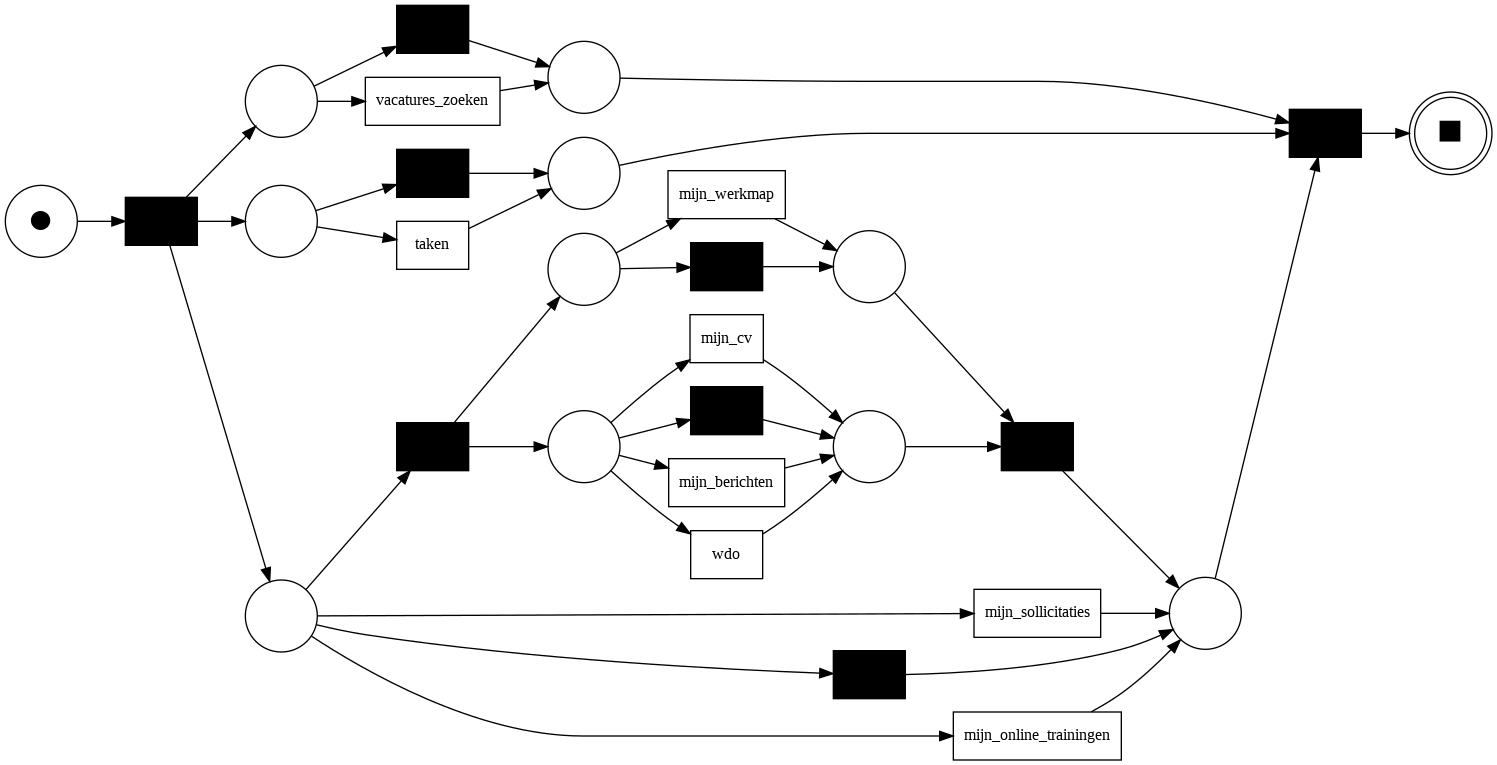

In [17]:
# Top k개 Variant를 필터링 (= 가장 많은 Case들이 따라간 Trace)

# top 45개의 Variant로 필터링
top45 = pm4py.filter_variants_top_k(init_log, k = 45, activity_key='PAGE_NAME',timestamp_key='TIMESTAMP', case_id_key='CustomerID')
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(top45, activity_key='PAGE_NAME',timestamp_key='TIMESTAMP', case_id_key='CustomerID')
pm4py.view_petri_net(net, initial_marking, final_marking)

> 실습2> top25개의 Variant로 필터링



*   Pandas Dataframe을 Event Log 형태로 변환

---


*   Case ID: 'case:concept:name'
*   Activity name : 'concept:name'
*   Timestamp : 'time:timestamp'





In [18]:
# 경고메세지 무시
import warnings
warnings.filterwarnings('ignore')


eventlog = pm4py.format_dataframe(df= init_log,
                                  case_id= 'CustomerID',
                                  activity_key= 'PAGE_NAME',
                                  timestamp_key= 'TIMESTAMP')
eventlog.head(3)

CustomerID                     PAGE_NAME               TIMESTAMP  \
0    1000178                         taken 2016-01-07 01:30:16.967   
1    1000184                         taken 2015-07-29 10:25:07.700   
2    1000184  mijn_bewijs_van_inschrijving 2015-10-21 08:39:50.823   

  AgeCategory_x Gender_x  ComplaintTopicID case:concept:name  \
0         50-65        M              20.0           1000178   
1         18-29        M              20.0           1000184   
2         30-39        M              62.0           1000184   

                   concept:name          time:timestamp  @@index  @@case_index  
0                         taken 2016-01-07 01:30:16.967        0             0  
1                         taken 2015-07-29 10:25:07.700        1             1  
2  mijn_bewijs_van_inschrijving 2015-10-21 08:39:50.823        2             1

# Advanced Filtering



*   Filtering Activity
---



In [19]:
#Start & End Activities 도출
start_activities = pm4py.get_start_activities(eventlog)
print(start_activities)

end_activities = pm4py.get_end_activities(eventlog)
print(end_activities)

{'taken': 2673, 'vacatures_zoeken': 3956, 'mijn_werkmap': 2115, 'mijn_agenda': 30, 'sollicitatie-wijziging': 174, 'mijn_online_trainingen': 509, 'wdo': 1455, 'timeout.htm': 162, 'home': 164, 'mijn_cv': 1017, 'wijziging_doorgeven': 169, 'mijn_berichten': 1084, 'wederzijds-goedvinden': 7, 'inschrijven': 104, 'mijn_sollicitaties': 594, 'foutopgetreden.html': 205, 'mijn_documenten': 141, 'mijn_netwerk': 22, 'Portal (ignore_request_page)': 147, 'mijn_bewijs_van_inschrijving': 267, 'mijn_rechten_en_plichten': 43, 'PORTAL.wwsec_app_priv.logout': 12, 'mijn_tips': 35, 'wdo211832': 37, 'wajong': 1, 'evenement': 4, 'onderhoud.htm': 4, 'over-werk-nl': 5, 'handleiding': 33, 'tip-van-de-week': 10, 'gegevens': 2, 'werk-zoeken': 14, 'uwv': 3, 'transitievergoeding': 1, 'werkmap': 1, 'aanvragen-tw': 1, 'cv-plaatsen': 3, 'ignore_request_page': 1, 'regelen': 2, 'rechtbijstand': 1, 'bijstandsuitkering': 2, 'melding_sha2': 1, 'wdo214236': 1}
{'taken': 4664, 'mijn_berichten': 1443, 'mijn_werkmap': 1630, 'wdo

Text(0.5, 1.0, 'End activity Distribution')

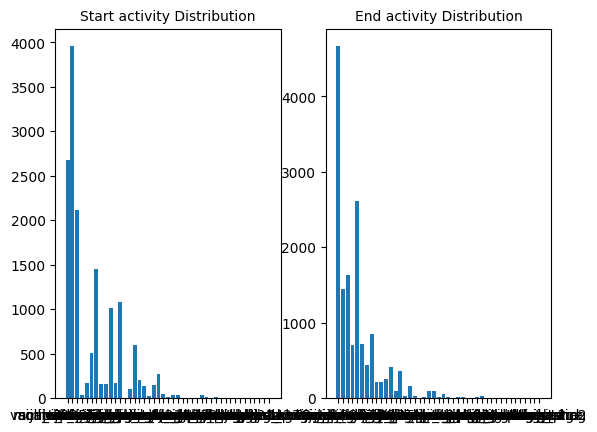

In [20]:
#Start activity와 End activity의 분포 barchart
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=1, ncols=2)
ax=ax.ravel()
ax[0].bar(x=list(start_activities.keys()),height=list(start_activities.values()))
ax[0].set_title("Start activity Distribution",fontsize=10)
ax[1].bar(x=list(end_activities.keys()),height=list(end_activities.values()))
ax[1].set_title("End activity Distribution",fontsize=10)

In [21]:
# 첫 activity가 'wdo'인 케이스
wdo_events = pm4py.filter_start_activities(eventlog,activities=['wdo'])
wdo_events.head(3)

CustomerID         PAGE_NAME               TIMESTAMP AgeCategory_x  \
40    1002890               wdo 2015-09-28 14:28:55.887         50-65   
41    1002890  vacatures_zoeken 2015-10-12 15:11:00.043         50-65   
42    1002890             taken 2015-11-03 22:52:57.893         30-39   

   Gender_x  ComplaintTopicID case:concept:name      concept:name  \
40        M              33.0           1002890               wdo   
41        V              58.0           1002890  vacatures_zoeken   
42        M              31.0           1002890             taken   

            time:timestamp  @@index  @@case_index  
40 2015-09-28 14:28:55.887       40            14  
41 2015-10-12 15:11:00.043       41            14  
42 2015-11-03 22:52:57.893       42            14

In [22]:
pm4py.get_start_activities(wdo_events)

{'wdo': 1455}

In [24]:
# 마지막 activity가 'ignore_request_page'인 케이스
ignore_events = pm4py.filter_end_activities(eventlog, activities=['ignore_request_page'])
ignore_events.head(3)

CustomerID                     PAGE_NAME               TIMESTAMP  \
25402    2063028  Portal (ignore_request_page) 2015-08-23 21:36:38.940   
25403    2063028                  mijn_werkmap 2015-08-23 21:48:13.890   
25404    2063028              vacatures_zoeken 2015-08-25 11:40:56.487   

      AgeCategory_x Gender_x  ComplaintTopicID case:concept:name  \
25402         40-49        V              61.0           2063028   
25403         30-39        V              67.0           2063028   
25404         40-49        M               2.0           2063028   

                       concept:name          time:timestamp  @@index  \
25402  Portal (ignore_request_page) 2015-08-23 21:36:38.940    25402   
25403                  mijn_werkmap 2015-08-23 21:48:13.890    25403   
25404              vacatures_zoeken 2015-08-25 11:40:56.487    25404   

       @@case_index  
25402          6809  
25403          6809  
25404          6809

> 실습3> 첫 activity가 'taken'인 케이스 갯수


*   Filtering Timestamp
----


In [30]:
# 특정 시점에 모든 이벤트가 포함되는 이벤트 데이터만 필터링
filtered_log = pm4py.filter_time_range(eventlog, "2016-01-01 00:00:00", "2016-06-30 00:00:00")
filtered_log.head()

CustomerID               PAGE_NAME               TIMESTAMP AgeCategory_x  \
0     1000178                   taken 2016-01-07 01:30:16.967         50-65   
4     1000184          mijn_berichten 2016-02-07 08:25:01.140         50-65   
21    1000730                   taken 2016-01-26 11:48:32.337         30-39   
22    1000730            mijn_werkmap 2016-02-22 10:13:30.837         50-65   
23    1000812  sollicitatie-wijziging 2016-01-29 14:43:02.330         30-39   

   Gender_x  ComplaintTopicID case:concept:name            concept:name  \
0         M              20.0           1000178                   taken   
4         V              31.0           1000184          mijn_berichten   
21        M              13.0           1000730                   taken   
22        V              33.0           1000730            mijn_werkmap   
23        M              48.0           1000812  sollicitatie-wijziging   

            time:timestamp  @@index  @@case_index  
0  2016-01-07 01:30:16.967        0             0  
4  2016-02-07 08:25:01.140        4             1  
21 2016-01-26 11:48:32.337       21             6  
22 2016-02-22 10:13:30.837       22             6  
23 2016-01-29 14:43:02.330       23             7

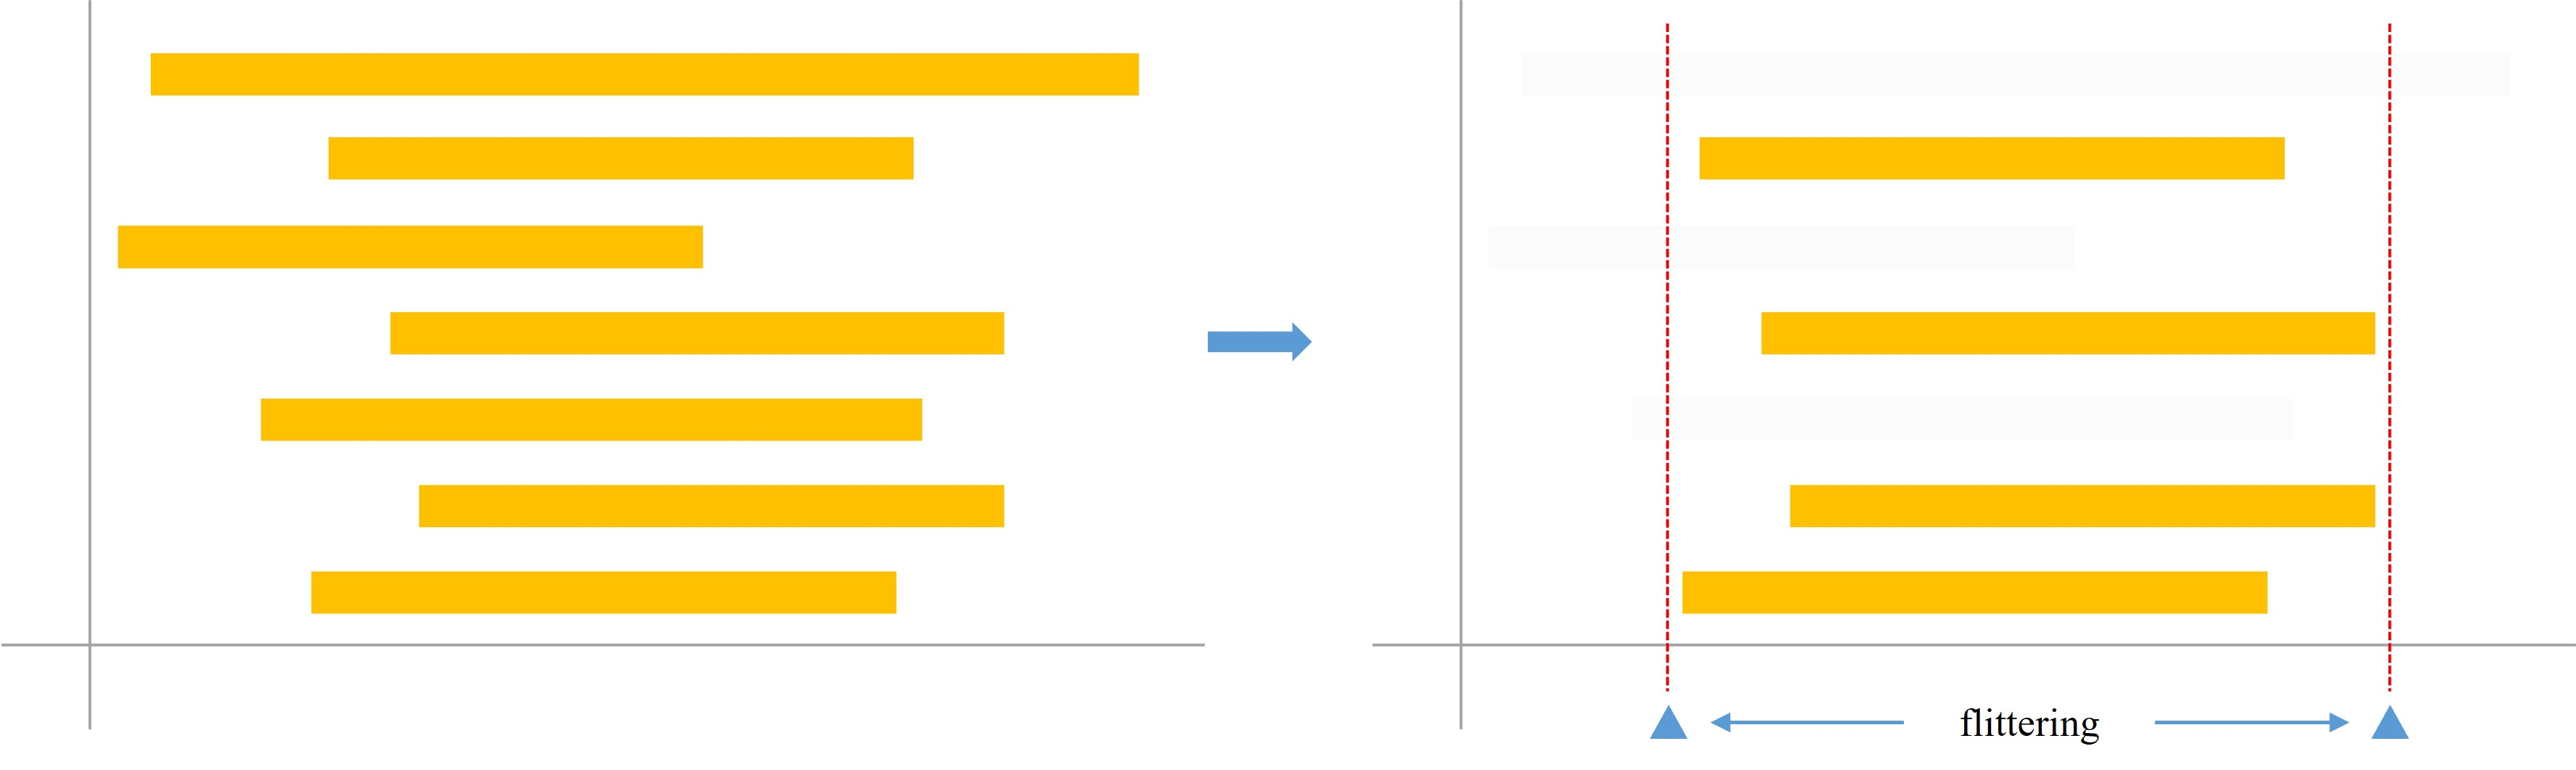